In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Time Complexity

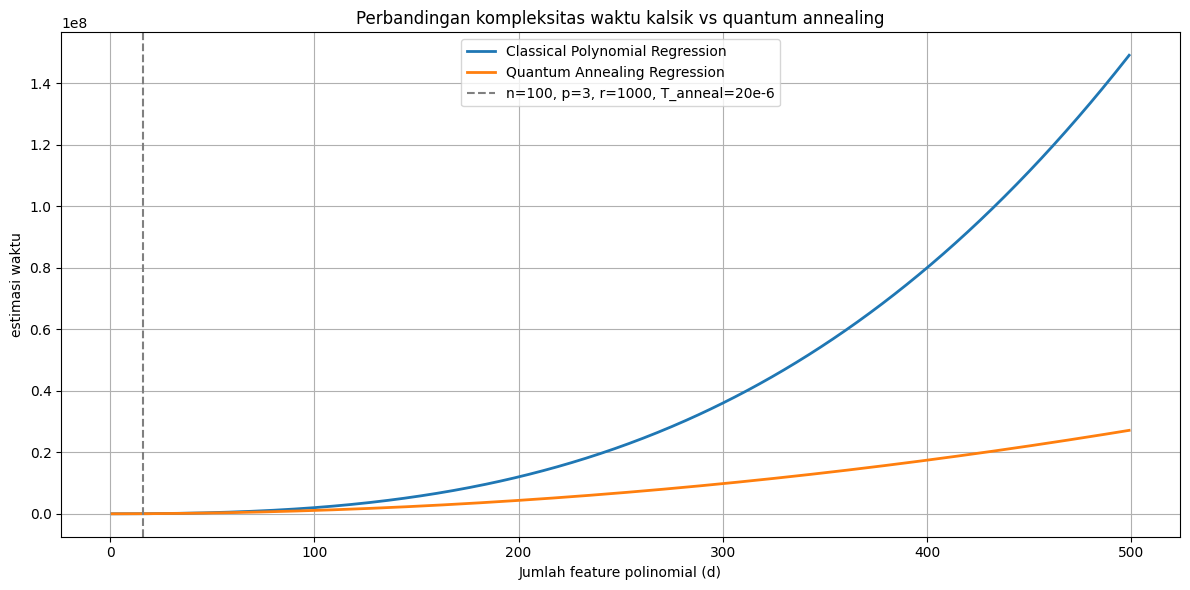

In [78]:
# Parameters
n = 100                # Number of data samples
p = 3                   # Precision (number of bits per weight)
r = 1000                # Number of QA reads
T_anneal = 20e-6        # Annealing time per read (seconds)

# Range of number of polynomial features (after expansion)
d_values = np.arange(1, 500, 1)

# Classical time: O(n * d^2 + d^3)
time_classical = n * d_values**2 + d_values**3

# Quantum Annealing time: O(n * d^2 + d^2 * p^2 + r * T_anneal + d * p)
time_QA = n * d_values**2 + d_values**2 * p**2 + r * T_anneal + d_values * p

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(d_values, time_classical, label='Classical Polynomial Regression', linewidth=2)
plt.plot(d_values, time_QA, label='Quantum Annealing Regression', linewidth=2)
plt.axvline(x=16, color='gray', linestyle='--', label='n=100, p=3, r=1000, T_anneal=20e-6')

# Labels and formatting
plt.title('Perbandingan kompleksitas waktu kalsik vs quantum annealing')
plt.xlabel('Jumlah feature polinomial (d)')
plt.ylabel('estimasi waktu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### SMAPE

In [58]:
df = pd.read_excel('evaluation_results3.xlsx')

In [59]:
df

,Dataset_Name,Number of Row,Precision,Degree,Number_Of_Features,Model,Dataset_split,MSE,MAE,R2 Score,SMAPE,preproccesing_time,execution_time,postproccesing_time,total_time,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,dataset_1.csv,20433,3,2,45,Fixstar,Train,0.018239,0.097795,0.675878,28.534410,0.187478,6.791728,0.001426,6.980633,NaN,NaN,NaN
1,dataset_1.csv,20433,3,2,45,Fixstar,Test,0.018886,0.099759,0.675141,29.121494,0.187478,6.791728,0.001426,6.980633,NaN,NaN,NaN
2,dataset_1.csv,20433,3,2,45,Sklearn,Train,0.016938,0.092703,0.698996,26.172014,-,0.017862,-,0.017862,NaN,NaN,NaN
3,dataset_1.csv,20433,3,2,45,Sklearn,Test,0.017543,0.094886,0.698250,26.577572,-,0.017862,-,0.017862,NaN,NaN,NaN
4,dataset_1.csv,20433,3,3,165,Fixstar,Train,0.017112,0.094518,0.695908,27.768058,1.998762,9.134884,0.001515,11.135161,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,dataset_8.csv,2049280,2,4,210,Sklearn,Test,0.000009,0.001887,0.998979,6.168957,-,33.419955,-,33.419955,NaN,NaN,NaN
500,dataset_8.csv,2049280,2,5,462,Fixstar,Train,0.000080,0.005989,0.991292,14.447331,32.970771,39.217940,0.004463,72.193174,NaN,NaN,NaN
501,dataset_8.csv,2049280,2,5,462,Fixstar,Test,0.000080,0.005997,0.991278,14.445881,32.970771,39.217940,0.004463,72.193174,NaN,NaN,NaN
502,dataset_8.csv,2049280,2,5,462,Sklearn,Train,0.000009,0.001800,0.999040,6.028618,-,168.189975,-,168.189975,NaN,NaN,NaN


In [60]:
df_test = df[df['Dataset_split'] == 'Test'].copy()
df_test = df_test.pivot_table(
    index=['Dataset_Name', 'Degree', 'Precision'],
    columns='Model',
    values='SMAPE'
).reset_index()
df_test['SMAPE_Diff'] =  df_test['Sklearn'] - df_test['Fixstar']

In [61]:
df_test_pres2 = df_test[df_test['Precision'] == 2].copy()
fixstar_better = (df_test_pres2['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_pres2['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_pres2['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_pres2['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_pres2['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     2.000000
Sklearn Better (count)    40.000000
Average SMAPE_Diff        -8.832168
Max SMAPE_Diff            84.045981
Min SMAPE_Diff           -53.074819
dtype: float64

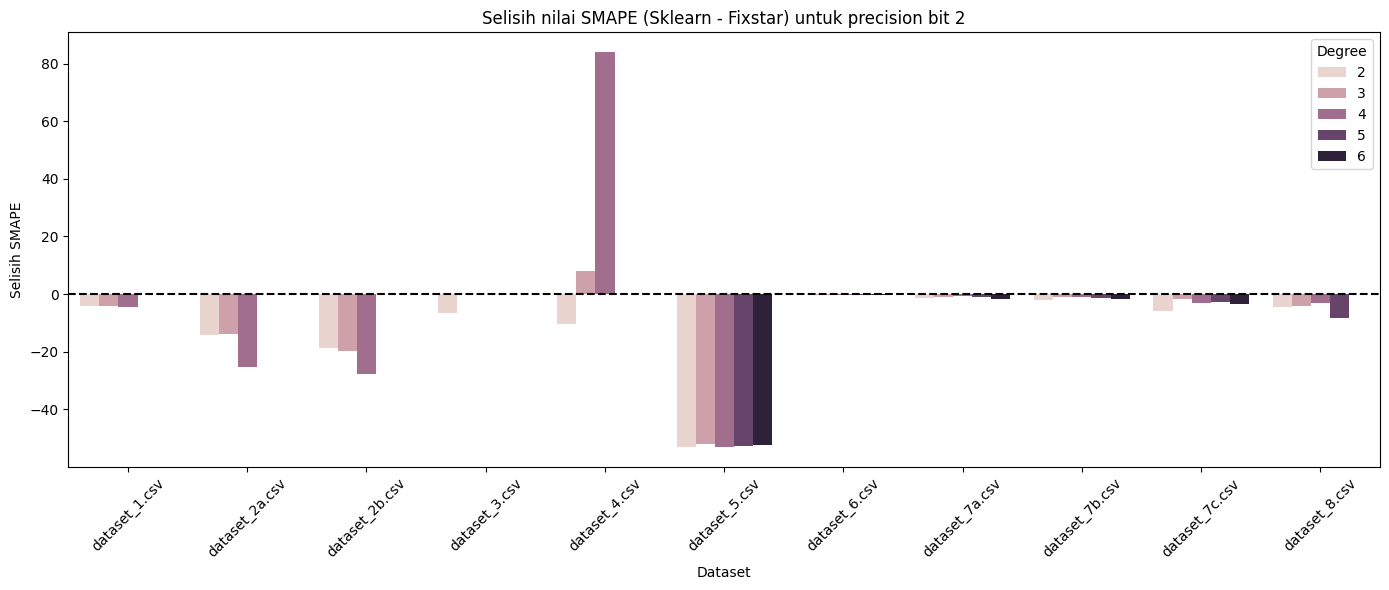

In [62]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_test_pres2, x="Dataset_Name", y="SMAPE_Diff", hue="Degree")
plt.axhline(0, color="black", linestyle="--")
plt.title("Selisih nilai SMAPE (Sklearn - Fixstar) untuk precision bit 2")
plt.ylabel("Selisih SMAPE")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# Top 5: Fixstar outperforms Sklearn
df_test_pres2.sort_values('SMAPE_Diff', ascending=False).head()


Model,Dataset_Name,Degree,Precision,Fixstar,Sklearn,SMAPE_Diff
36,dataset_4.csv,4,2,20.943543,104.989524,84.045981
33,dataset_4.csv,3,2,21.270742,29.227926,7.957184
54,dataset_6.csv,2,2,38.946753,38.873993,-0.072760
60,dataset_6.csv,4,2,39.151638,38.966265,-0.185373
57,dataset_6.csv,3,2,39.154294,38.954376,-0.199918


In [64]:
# Top 5: Sklearn outperforms Fixstar
df_test_pres2.sort_values('SMAPE_Diff').head()

Model,Dataset_Name,Degree,Precision,Fixstar,Sklearn,SMAPE_Diff
39,dataset_5.csv,2,2,85.166680,32.091861,-53.074819
45,dataset_5.csv,4,2,84.946638,31.991504,-52.955133
48,dataset_5.csv,5,2,84.946638,32.018648,-52.927990
51,dataset_5.csv,6,2,84.606759,32.120202,-52.486557
42,dataset_5.csv,3,2,84.946638,32.766815,-52.179823


In [65]:
df_test_pres3 = df_test[df_test['Precision'] == 3].copy()
fixstar_better = (df_test_pres3['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_pres3['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_pres3['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_pres3['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_pres3['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     2.000000
Sklearn Better (count)    40.000000
Average SMAPE_Diff        -4.740588
Max SMAPE_Diff            76.935101
Min SMAPE_Diff           -29.180639
dtype: float64

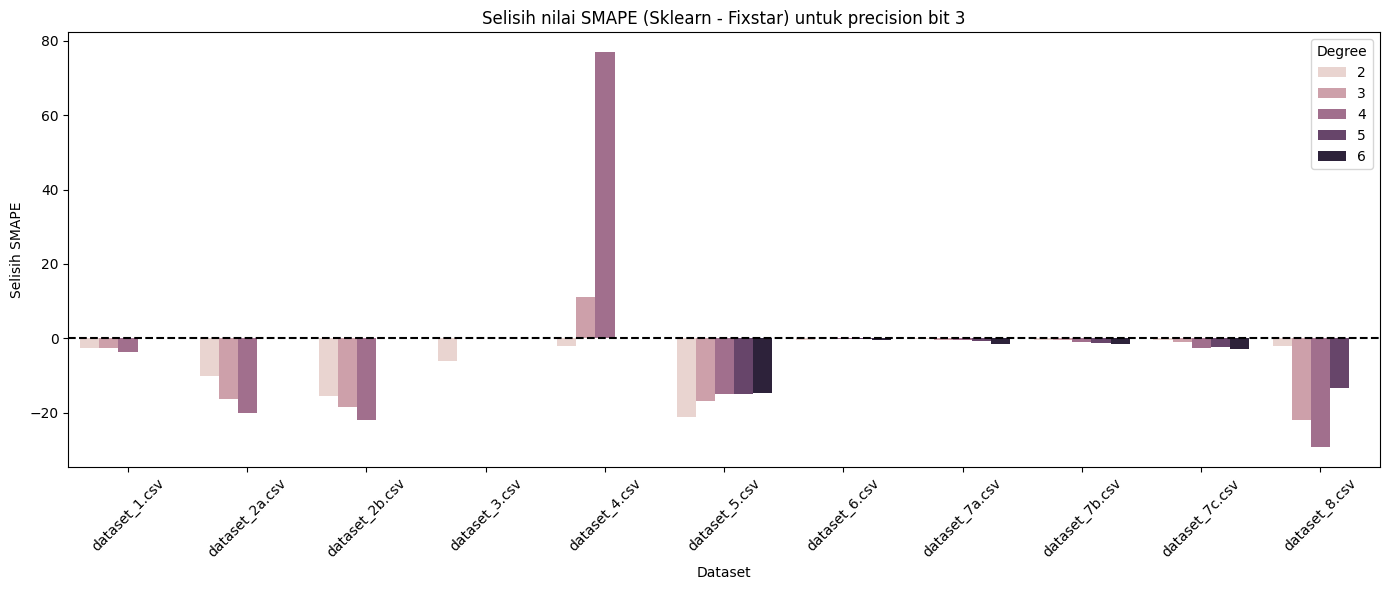

In [66]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_test_pres3, x="Dataset_Name", y="SMAPE_Diff", hue="Degree")
plt.axhline(0, color="black", linestyle="--")
plt.title("Selisih nilai SMAPE (Sklearn - Fixstar) untuk precision bit 3")
plt.ylabel("Selisih SMAPE")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Top 5: Fixstar outperforms Sklearn
df_test_pres3.sort_values('SMAPE_Diff', ascending=False).head()


Model,Dataset_Name,Degree,Precision,Fixstar,Sklearn,SMAPE_Diff
37,dataset_4.csv,4,3,28.054422,104.989524,76.935101
34,dataset_4.csv,3,3,18.233653,29.227926,10.994273
58,dataset_6.csv,3,3,38.982459,38.954376,-0.028082
61,dataset_6.csv,4,3,39.013545,38.966265,-0.047279
64,dataset_6.csv,5,3,38.991075,38.822262,-0.168813


In [68]:
# Top 5: Sklearn outperforms Fixstar
df_test_pres3.sort_values('SMAPE_Diff').head()

Model,Dataset_Name,Degree,Precision,Fixstar,Sklearn,SMAPE_Diff
121,dataset_8.csv,4,3,35.349596,6.168957,-29.180639
118,dataset_8.csv,3,3,28.395617,6.322728,-22.072889
25,dataset_2b.csv,4,3,34.202646,12.141169,-22.061477
40,dataset_5.csv,2,3,53.338032,32.091861,-21.246171
16,dataset_2a.csv,4,3,23.161937,3.228198,-19.933739


In [69]:
df_test_pres4 = df_test[df_test['Precision'] == 4].copy()
fixstar_better = (df_test_pres4['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_pres4['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_pres4['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_pres4['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_pres4['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     8.000000
Sklearn Better (count)    34.000000
Average SMAPE_Diff        -1.372853
Max SMAPE_Diff            81.105456
Min SMAPE_Diff           -20.482192
dtype: float64

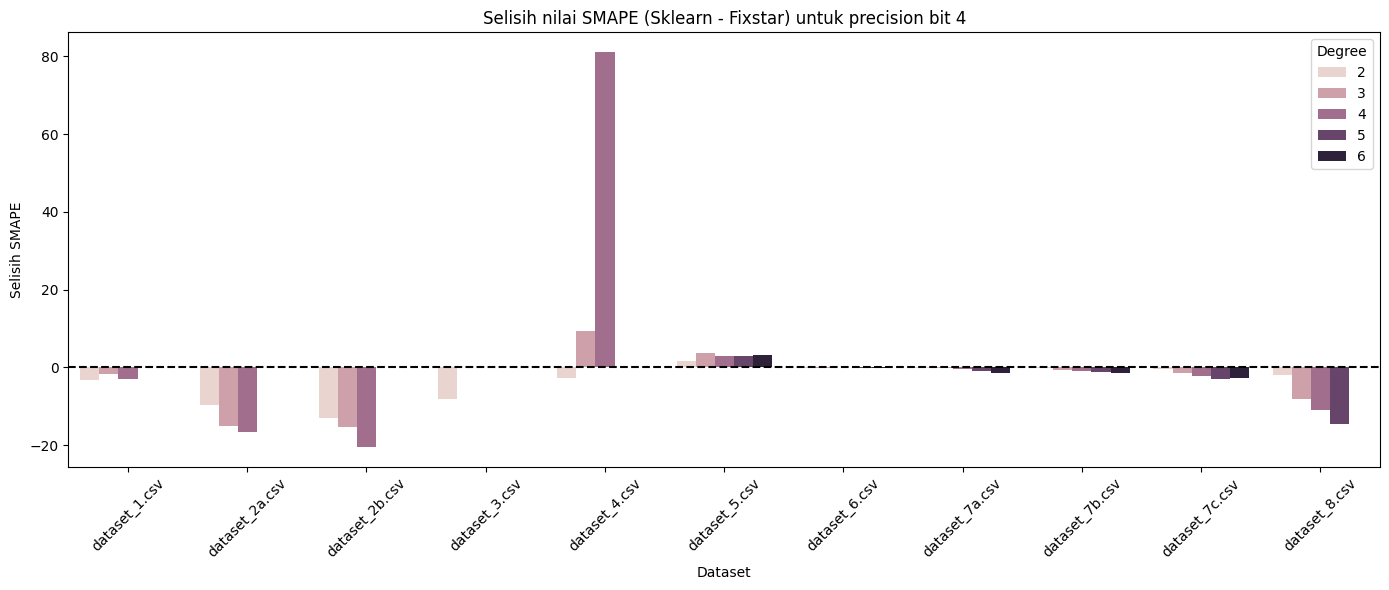

In [70]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_test_pres4, x="Dataset_Name", y="SMAPE_Diff", hue="Degree")
plt.axhline(0, color="black", linestyle="--")
plt.title("Selisih nilai SMAPE (Sklearn - Fixstar) untuk precision bit 4")
plt.ylabel("Selisih SMAPE")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Top 5: Fixstar outperforms Sklearn
df_test_pres4.sort_values('SMAPE_Diff', ascending=False).head()

Model,Dataset_Name,Degree,Precision,Fixstar,Sklearn,SMAPE_Diff
38,dataset_4.csv,4,4,23.884067,104.989524,81.105456
35,dataset_4.csv,3,4,19.845629,29.227926,9.382297
44,dataset_5.csv,3,4,29.133248,32.766815,3.633567
53,dataset_5.csv,6,4,29.056644,32.120202,3.063558
47,dataset_5.csv,4,4,29.008218,31.991504,2.983286


In [72]:
# Top 5: Sklearn outperforms Fixstar
df_test_pres4.sort_values('SMAPE_Diff').head()

Model,Dataset_Name,Degree,Precision,Fixstar,Sklearn,SMAPE_Diff
26,dataset_2b.csv,4,4,32.623361,12.141169,-20.482192
17,dataset_2a.csv,4,4,19.745688,3.228198,-16.517490
23,dataset_2b.csv,3,4,28.077946,12.736729,-15.341217
14,dataset_2a.csv,3,4,19.562093,4.536256,-15.025836
125,dataset_8.csv,5,4,20.551826,6.002249,-14.549577


In [73]:
df_test_deg2 = df_test[df_test['Degree'] == 2].copy()
fixstar_better = (df_test_deg2['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_deg2['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_deg2['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_deg2['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_deg2['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     1.000000
Sklearn Better (count)    32.000000
Average SMAPE_Diff        -6.661131
Max SMAPE_Diff             1.601399
Min SMAPE_Diff           -53.074819
dtype: float64

In [74]:
df_test_deg3 = df_test[df_test['Degree'] == 3].copy()
fixstar_better = (df_test_deg3['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_deg3['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_deg3['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_deg3['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_deg3['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     4.000000
Sklearn Better (count)    26.000000
Average SMAPE_Diff        -6.234450
Max SMAPE_Diff            10.994273
Min SMAPE_Diff           -52.179823
dtype: float64

In [75]:
df_test_deg4 = df_test[df_test['Degree'] == 4].copy()
fixstar_better = (df_test_deg4['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_deg4['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_deg4['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_deg4['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_deg4['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     5.000000
Sklearn Better (count)    25.000000
Average SMAPE_Diff        -0.726035
Max SMAPE_Diff            84.045981
Min SMAPE_Diff           -52.955133
dtype: float64

In [76]:
df_test_deg5 = df_test[df_test['Degree'] == 5].copy()
fixstar_better = (df_test_deg5['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_deg5['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_deg5['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_deg5['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_deg5['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     1.000000
Sklearn Better (count)    17.000000
Average SMAPE_Diff        -6.452916
Max SMAPE_Diff             2.900478
Min SMAPE_Diff           -52.927990
dtype: float64

In [77]:
df_test_deg6 = df_test[df_test['Degree'] == 6].copy()
fixstar_better = (df_test_deg6['SMAPE_Diff'] > 0).sum()
sklearn_better = (df_test_deg6['SMAPE_Diff'] < 0).sum()

summary = {
    'Fixstar Better (count)': fixstar_better,
    'Sklearn Better (count)': sklearn_better,
    'Average SMAPE_Diff': df_test_deg6['SMAPE_Diff'].mean(),
    'Max SMAPE_Diff': df_test_deg6['SMAPE_Diff'].max(),
    'Min SMAPE_Diff': df_test_deg6['SMAPE_Diff'].min()
}
pd.Series(summary)

Fixstar Better (count)     1.000000
Sklearn Better (count)    14.000000
Average SMAPE_Diff        -5.528750
Max SMAPE_Diff             3.063558
Min SMAPE_Diff           -52.486557
dtype: float64